In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

import warnings

In [2]:
warnings.filterwarnings('ignore')

# Workflow goals

----
The data science solutions workflow solves for seven major goals.

Classifying. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

Correlating. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

Converting. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

Correcting. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

Creating. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

Charting. How to select the right visualization plots and charts depending on nature of the data and the solution goals.



In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df,test_df]
#we combine these datasets together to run a few operations together

In [4]:
type(combine)

list

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

Null Values Cabin>Age>Embared contain null values in the data set
Cabin>Age are incomplete in case of test set

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df['Survived'].describe(percentiles = [.61,.62])

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
50%        0.000000
61%        0.000000
62%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [11]:
train_df['Parch'].describe(percentiles = [.75,.8])

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
75%        0.000000
80%        1.000000
max        6.000000
Name: Parch, dtype: float64

In [12]:
train_df['SibSp'].describe(percentiles = [.68,.69])

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
50%        0.000000
68%        0.000000
69%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [13]:
train_df[['Fare','Age']].describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.9,.99])

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
10%,7.550000,14.000000
20%,7.854200,19.000000
30%,8.050000,22.000000
40%,10.500000,25.000000
50%,14.454200,28.000000
60%,21.679200,31.800000


In [14]:
train_df.describe(include=['O'])#include object type datatypes

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Miss. Margaret Edith",male,CA. 2343,G6,S
freq,1,577,7,4,644


What is the distribution of categorical features?

Names are unique across the dataset (count=unique=891)
Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
Embarked takes three possible values. S port used by most passengers (top=S)
Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [15]:
train_df[['Pclass','Survived']].groupby(['Pclass'],\
                                        as_index=False).mean().sort_values(by='Survived', ascending=False)
# 62% of first class passengers survived 47% of second class and 24% of third class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[['Sex','Survived']].groupby(['Sex'],\
                                        as_index=False).mean().sort_values(by='Survived', ascending=False)
#74% of female passengers survived and 18% of male passengers

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [18]:
train_df[['SibSp','Survived']].groupby(['SibSp'],\
                                        as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train_df[['Parch','Survived']].groupby(['Parch'],\
                                        as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

We should consider Age (our assumption classifying #2) in our model training.
Complete the Age feature for null values (completing #1).
We should band age groups (creating #3).

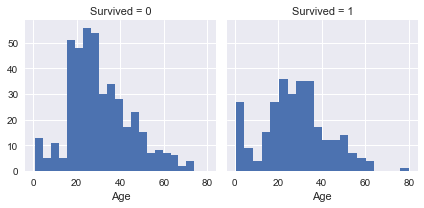

In [20]:
plt.rcParams['figure.figsize']=8,4
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

---
Analyze by visualizing data¶
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

Correlating numerical features
Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

Observations.

Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.

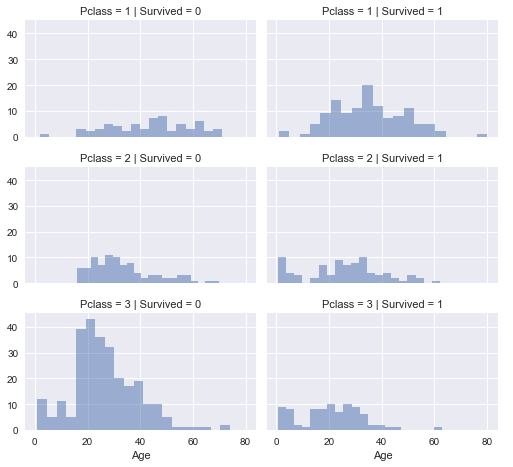

In [21]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

In [22]:
# from the above observations we should include Pclass as one of our feature for training the model

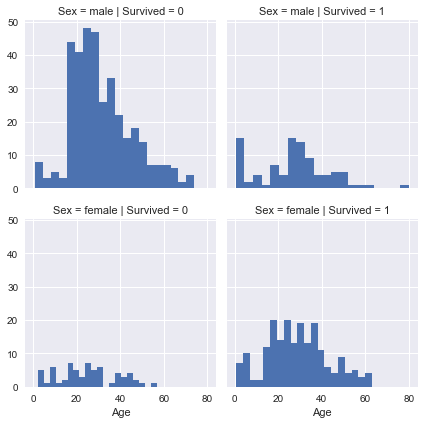

In [23]:
plt.rcParams['figure.figsize']=8,4
g = sns.FacetGrid(train_df,col='Survived',row='Sex')
g.map(plt.hist,'Age',bins=20)

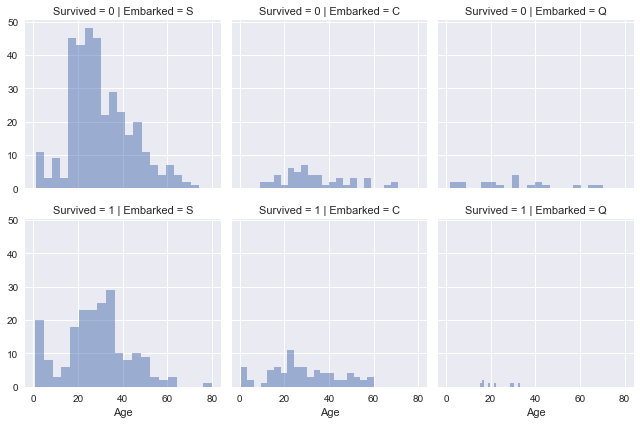

In [24]:
g = sns.FacetGrid(train_df,col='Embarked',row='Survived')
g.map(plt.hist,'Age',bins=20,alpha=0.5)

In [25]:
train_df[train_df['Embarked'] == 'C'].head()
train_df[train_df['Embarked'] == 'C'].info()
train_df[train_df['Embarked'] == 'C'].describe(include=['O'])
train_df[train_df['Embarked'] == 'C'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    168 non-null int64
Survived       168 non-null int64
Pclass         168 non-null int64
Name           168 non-null object
Sex            168 non-null object
Age            130 non-null float64
SibSp          168 non-null int64
Parch          168 non-null int64
Ticket         168 non-null object
Fare           168 non-null float64
Cabin          69 non-null object
Embarked       168 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 17.1+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,168.000000,168.000000,168.000000,130.000000,168.000000,168.000000,168.000000
mean,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
std,259.454201,0.498608,0.944100,15.434860,0.557213,0.660481,83.912994
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,4.012500
25%,235.500000,0.000000,1.000000,21.250000,0.000000,0.000000,13.697950
50%,455.000000,1.000000,1.000000,29.000000,0.000000,0.000000,29.700000
75%,651.000000,1.000000,3.000000,40.000000,1.000000,1.000000,78.500025
max,890.000000,1.000000,3.000000,71.000000,2.000000,3.000000,512.329200


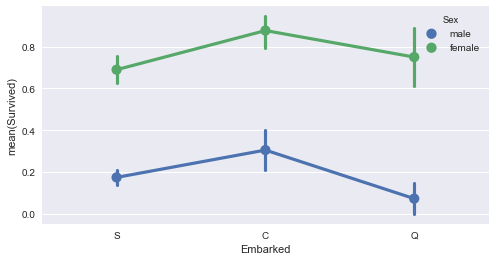

In [26]:
sns.pointplot(data=train_df,x='Embarked',y='Survived',hue='Sex')
#from this plot we understand that the persons who embarked at C had a higher rate of survival and Q had the lowest

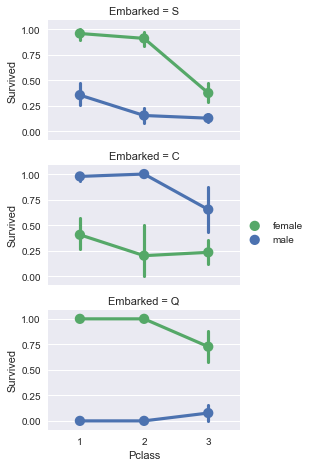

In [27]:
grid = sns.FacetGrid(train_df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette="deep")
grid.add_legend()
#Observations.

#Female passengers had much better survival rate than males. Confirms classifying (#1).
#Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
#Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
#Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
#Decisions.

#Add Sex feature to model training.
#Complete and add Embarked feature to model training.

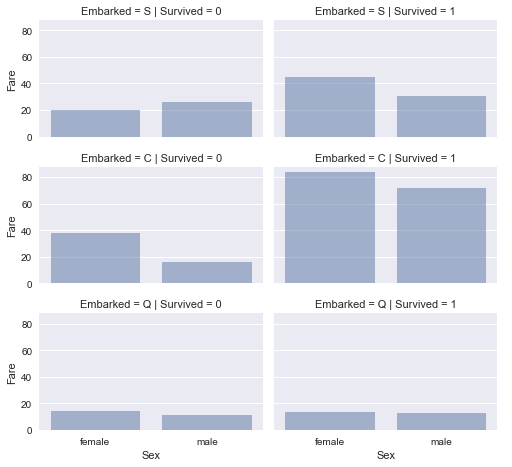

In [28]:
grid = sns.FacetGrid(data=train_df,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',ci=None,alpha=0.5)
grid.add_legend()

----
Observations.

Higher fare paying passengers had better survival. 
Confirms our assumption for creating (#4) fare ranges.
Port of embarkation correlates with survival rates. 
Confirms correlating (#1) and completing (#2).

Decisions.

Consider banding Fare feature.

----
Wrangle data
We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

Correcting by dropping features¶
This is a good starting goal to execute. By dropping features we are dealing with fewer data points. Speeds up our notebook and eases the analysis.

Based on our assumptions and decisions we want to drop the Cabin (correcting #2) and Ticket (correcting #1) features.

Note that where applicable we perform operations on both training and testing datasets together to stay consistent.

In [29]:
print("Before",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine=[train_df,test_df]
"After",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [31]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
#In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches 
#the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.
print(pd.crosstab(train_df['Title'],train_df['Sex']))
print(train_df['Title'].unique())
print(train_df.shape)

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
(891, 11)


In [32]:
print(dataset.tail())
combine[1].Title.tail()

     PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch      Fare Embarked   Title  
413      0    8.0500        S      Mr  
414      0  108.9000        C    Dona  
415      0    7.2500        S      Mr  
416      0    8.0500        S      Mr  
417      1   22.3583        C  Master  


413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, dtype: object

In [33]:
type(dataset)

pandas.core.frame.DataFrame

In [34]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Don','Rev','Dr','Major','Lady',\
                                                 'Sir','Col','Capt','Countess','Jonkheer'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [35]:
title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [36]:
train_df[train_df['Title'] == 4].Age.mean()

4.574166666666667

----
Creating new feature extracting from existing
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In the following code we extract Title feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The expand=False flag returns a DataFrame.

Observations.

When we plot Title, Age, and Survived, we note the following observations.

Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
Survival among Title Age bands varies slightly.
Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).
Decision.

We decide to retain the new Title feature for model training.

In [37]:
#Now we can safely drop the Name feature from training and testing datasets.
#We also do not need the PassengerId feature in the training dataset.

In [38]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)

In [39]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [40]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3.0


In [41]:
test_df = test_df.drop('Name',axis=1)
combine=[train_df,test_df]

In [42]:
train_df.shape,test_df.shape

((891, 9), (418, 9))

Converting a categorical feature¶
Now we can convert features which contain strings to numerical values.
This is required by most model algorithms.
Doing so will also help us in achieving the feature completing goal.

Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0

In [43]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


---
Completing a numerical continuous feature
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.

A simple way is to generate random numbers between mean and standard deviation.

More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

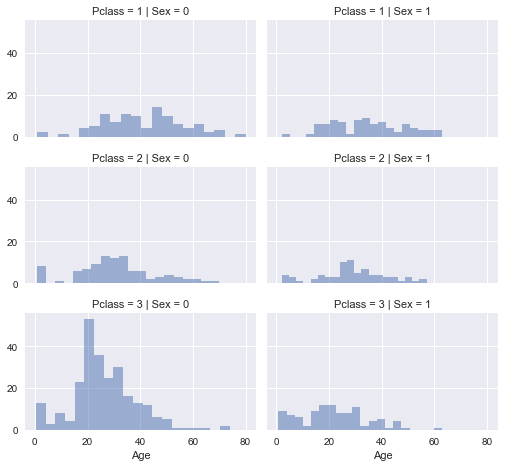

In [44]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [45]:
#In Pclass 3 majority of males were in the age group 15-35 and females were in the age group 15-20
#hence from the given plot we know that there is a correlation between age Pclass and sex

In [46]:
#Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [47]:
for dataset in combine:
    for i in range(0,2):#for sex
        for j in range(0,3):#for Pclass
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # method 1{age_mean = guess_df.mean()
            #age_std = guess_df.std()
            #age_guess = rnd.uniform(age_mean-age_std,age_mean+age_std)}
            age_guess = guess_df.median()
            
            #convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5
            
        for i in range(0,2):
            for j in range(0,3):
                dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age']=guess_ages[i,j]
        dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [48]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,27.666667,0.523008,0.381594,32.204208,1.728395
std,0.486592,0.836071,0.477990,14.916848,1.102743,0.806057,49.693429,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,25.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


In [49]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [50]:
train_df.Age.median()

25.0

In [51]:
# let us create age bands and determine their correlations with survived
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.594771
1,"(16.0, 32.0]",0.310421
2,"(32.0, 48.0]",0.386473
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [52]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34,0,0,7.8292,Q,1.0
1,893,3,1,47,1,0,7.0000,S,3.0
2,894,2,0,62,0,0,9.6875,Q,1.0
3,895,3,0,27,0,0,8.6625,S,1.0
4,896,3,1,22,1,1,12.2875,S,3.0


----
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [53]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


In [54]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,27.666667,0.523008,0.381594,32.204208,1.728395
std,0.486592,0.836071,0.477990,14.916848,1.102743,0.806057,49.693429,1.030039
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,25.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000


In [55]:
# let us replace age with ordinals based on these age bands
# to get the age as ordinal values
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=32),'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <=48),'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <=64),'Age'] = 3
    dataset.loc[dataset['Age'] > 64,'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [56]:
# now we can safely drop the AgeBand column
train_df = train_df.drop('AgeBand',axis=1)

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null int64
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


In [58]:
combine=[train_df,test_df]

In [59]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1.0
1,893,3,1,2,1,0,7.0000,S,3.0
2,894,2,0,3,0,0,9.6875,Q,1.0
3,895,3,0,1,0,0,8.6625,S,1.0
4,896,3,1,1,1,1,12.2875,S,3.0


Create new features combining existing features
We can create new feature for FamilySize which combines Parch and SibSp.
This will enable us to drop Parch and Sibsp from our dataset.

In [60]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']+1
    
train_df[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [61]:
#We can create another feature IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1,'IsAlone'] = 1
    
train_df[['IsAlone','Survived']].groupby('IsAlone',as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [62]:
#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [63]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine = [train_df,test_df]

print(train_df.head())

   Survived  Pclass  Sex  Age     Fare Embarked  Title  IsAlone
0         0       3    0    1   7.2500        S      1        0
1         1       1    1    2  71.2833        C      3        0
2         1       3    1    1   7.9250        S      2        1
3         1       1    1    2  53.1000        S      3        0
4         0       3    0    2   8.0500        S      1        1


In [64]:
print(train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

(891, 8) (418, 8) (891, 8) (418, 8)


In [65]:
# we complete the empty embarked ports depending upon the most frequently occuring port
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [66]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [67]:
# Converting Categorical Feature to numeric
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [68]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [69]:
test_df.describe()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,1.263158,35.627188,0.464115,1.729665,0.605263
std,120.810458,0.841838,0.481622,0.818041,55.907576,0.685516,0.996940,0.489380
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,1.000000,7.895800,0.000000,1.000000,0.000000
50%,1100.500000,3.000000,0.000000,1.000000,14.454200,0.000000,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,2.000000,31.500000,1.000000,2.000000,1.000000
max,1309.000000,3.000000,1.000000,4.000000,512.329200,2.000000,5.000000,1.000000


In [70]:
# we complete the fare values of the test_df by using the median and in train_df we change it to various groups and then
# change it to ordinal values
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].dropna().median())
# or we can write test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1.0,1
1,893,3,1,2,7.0000,0,3.0,0
2,894,2,0,3,9.6875,2,1.0,1
3,895,3,0,1,8.6625,0,1.0,1
4,896,3,1,1,12.2875,0,3.0,0


In [71]:
train_df['FareBand'] = pd.qcut(train_df.Fare,4)
train_df[['FareBand','Survived']].groupby('FareBand',as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [72]:
#convert fare to ordinal values
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91,'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0),'Fare'] = 2
    dataset.loc[(dataset['Fare']>31.0),'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df = train_df.drop(['FareBand'],axis=1)
combine=[train_df,test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1
5,0,3,0,1,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,0
8,1,3,1,1,1,0,3,0
9,1,2,1,0,2,1,3,0


In [73]:
# We can also create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']
    
train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [74]:
# Training dataset
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [75]:
# Test set
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3


In [76]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']

Divide The training set into test set and training set using the test_train_split method and then use kfolds to check the accuracy of the algorithm on the training set and then test the final accuracy on test set

----
K-fold cross-validation
In this process, we split the dataset into K-equal partitions or folds. Then use one of the fold as the testing set and union of remaining sets as training set. Then we calculate the testing accuracy of our model. We repeat the process of choosing train and test from different folds, and calculating training error K-times(number of folds). Then we use average training accuracy as the estimate.

E.g if we have 150 rows in our dataset, and say our fold size is 5. Then we have 150/5 = 30 rows in each folds( say fold1, fold2, fold3, fold4 and fold5). Then we need to iterate 5 times. For first iteration our testing set is fold1 and remaining are training set. Then we calculate the testing error and say this be error1. In next iteration testing set is fold2 and others are training set. Then we get error2. We repeat this 5 times. Then the training accuracy will be:

training accuracy = ( error1 + …. + error5 ) / 5

In [77]:
kf = KFold(n_splits=5)

kf.get_n_splits(X_train,Y_train,LogisticRegression())

5

Now we split the given training set into training and test sets respectively using train_test_split
and Then we apply kfolds to get the accuracy on cross validation set and then use the trained algorithm to get the scores on
the test set we get

In [78]:
train,test = train_test_split(train_df,test_size=0.2)
print(train.shape)
print(test.shape)

(712, 9)
(179, 9)


In [79]:
X_train = train.drop('Survived',axis=1)
Y_train = train['Survived']

X_test = test.drop('Survived',axis=1)
Y_test = test['Survived']

In [80]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((712, 8), (712,), (179, 8), (179,))

In [81]:
type(X_train)

pandas.core.frame.DataFrame

In [82]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train,Y_train)

5

In [83]:
logreg = LogisticRegression()
validation_score = cross_val_score(logreg,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
logreg.fit(X_train,Y_train)
acc_test = round(logreg.score(X_test,Y_test)*100,2)
print('Accuracy of Logistic Regression is {}'.format(acc_test))

The validation score Using kfolds is  [0.82517483 0.74125874 0.80985915 0.84507042 0.77464789]
Accuracy of Logistic Regression is 76.54


In [84]:
SVM = SVC()
validation_score = cross_val_score(SVM,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
SVM.fit(X_train,Y_train)
acc_test = round(SVM.score(X_test,Y_test)*100,2)
print('Accuracy of Support Vector Machines is {}'.format(acc_test))

The validation score Using kfolds is  [0.8041958  0.81118881 0.82394366 0.82394366 0.80985915]
Accuracy of Support Vector Machines is 82.12


In [85]:
LinearSVM = LinearSVC()
validation_score = cross_val_score(LinearSVM,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
LinearSVM.fit(X_train,Y_train)
acc_test = round(LinearSVM.score(X_test,Y_test)*100,2)
print('Accuracy of Logistic Regression is {}'.format(acc_test))

The validation score Using kfolds is  [0.83216783 0.74825175 0.80985915 0.83098592 0.76760563]
Accuracy of Logistic Regression is 75.42


In [86]:
decision_tree = DecisionTreeClassifier()
validation_score = cross_val_score(decision_tree,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
decision_tree.fit(X_train,Y_train)
acc_test = round(decision_tree.score(X_test,Y_test)*100,2)
print('Accuracy of Decision Trees is {}'.format(acc_test))

The validation score Using kfolds is  [0.78321678 0.72727273 0.85211268 0.83802817 0.78169014]
Accuracy of Decision Trees is 79.33


In [87]:
random_forest = RandomForestClassifier()
validation_score = cross_val_score(random_forest,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
random_forest.fit(X_train,Y_train)
acc_test = round(random_forest.score(X_test,Y_test)*100,2)
print('Accuracy of Random Forest is {}'.format(acc_test))

The validation score Using kfolds is  [0.7972028  0.74825175 0.85915493 0.83802817 0.8028169 ]
Accuracy of Random Forest is 77.65


In [88]:
knn = KNeighborsClassifier()
validation_score = cross_val_score(knn,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
knn.fit(X_train,Y_train)
acc_test = round(knn.score(X_test,Y_test)*100,2)
print('Accuracy of K Neighbors Classifier is {}'.format(acc_test))

The validation score Using kfolds is  [0.8041958  0.72727273 0.85211268 0.77464789 0.81690141]
Accuracy of K Neighbors Classifier is 80.45


In [89]:
naive_bayes = GaussianNB()
validation_score = cross_val_score(naive_bayes,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
naive_bayes.fit(X_train,Y_train)
acc_test = round(naive_bayes.score(X_test,Y_test)*100,2)
print('Accuracy of Gaussian Naive Bayes is {}'.format(acc_test))

The validation score Using kfolds is  [0.79020979 0.72727273 0.81690141 0.80985915 0.76056338]
Accuracy of Gaussian Naive Bayes is 70.39


In [90]:
perceptron_classifier = Perceptron()
validation_score = cross_val_score(perceptron_classifier,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is ',validation_score)
perceptron_classifier.fit(X_train,Y_train)
acc_test = round(perceptron_classifier.score(X_test,Y_test)*100,2)
print('Accuracy of Perceptron is {}'.format(acc_test))

The validation score Using kfolds is  [0.81118881 0.74125874 0.74647887 0.80985915 0.73943662]
Accuracy of Perceptron is 67.6


In [91]:
SGDC = SGDClassifier()
validation_score = cross_val_score(SGDC,X_train,Y_train,cv=kf)
print('The validation score Using kfolds is',validation_score)
SGDC.fit(X_train,Y_train)
acc_test = round(SGDC.score(X_test,Y_test)*100,2)
print('Accuracy of SGD Classifier is {}'.format(acc_test))

The validation score Using kfolds is [0.8041958  0.39160839 0.77464789 0.61267606 0.77464789]
Accuracy of SGD Classifier is 73.18
